# Rate of change 

In [11]:
SAVE = True 
SAVE_PATH = "../charts/"
DATA_STORE_PATH_BASE = "../store/week1/"
DATA_STORE_PATH_WEEK = "../store/week2/"

In [12]:
EMPTY_CID = "QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn"
MY_PEERID = "12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5xmxuCi"

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def reversed_sort_dict_by_value(dic:dict)-> dict:
    return {key:val for key, val in reversed(sorted(dic.items(), key=lambda item: item[1]))}

def drop_none_unique_peers(df:pd.DataFrame) -> pd.DataFrame:
    df_filtered = df.drop_duplicates(subset=['peer'], keep=False)
    df_filtered = df_filtered[df_filtered["peer"] != MY_PEERID]
    df_filtered = df_filtered.reset_index()
    return df_filtered

def make_peerid_short(df:pd.DataFrame) -> pd.DataFrame:
    df["peer"] = df["peer"].apply(lambda p: p[:3] + '...' + p[-5:])
    return df 

In [15]:
df = pd.read_csv(DATA_STORE_PATH_BASE + "time.csv")
#df = drop_none_unique_peers(df)
print(len(df))
df.head()

36190


,peer,time,cid
0,12D3KooWHsshUtLVTUccPiFdmupxm3fhTgMnnZM76KPfhS...,2023-07-03 09:54:15,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
1,12D3KooWLAGdfENUAm6o7zia5n98VrdwYAMfVFxyxVLAVc...,2023-07-03 09:55:16,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
2,12D3KooWNqmnF2DKywda1JDPaL3Ej6W1cZXF2RSbqcCwEP...,2023-07-03 09:56:20,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
3,12D3KooWCkT234YfDHFvj9wzDzwTwJxe6z35TCe1MfSxTY...,2023-07-03 09:57:40,NONE
4,12D3KooWEja9effvbfwyuf4xVuLLpRL9fFYXG7cTyWnkgt...,2023-07-03 09:57:51,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn


In [16]:
week_df = pd.read_csv(DATA_STORE_PATH_WEEK + "time.csv")
week_df.head()

,peer,time,cid
0,12D3KooWKnxvF2bF9M2YfyGdf8XYCbpoUYJe5qWP8MQfpV...,2023-07-17 05:34:41,QmWZWRpAUjh3PUqED3Ps4aKhdyJGRZEyycgBgrfQLxNEg5...
1,QmSjGmuHCGDDennPzBQy1mjD918NrZ7XfGUfy3YQ7AH8LN,2023-07-17 05:38:47,QmY5jXoexekDfgQBgksr3bNXYamGdqR9hu9gpRZDM2fV5Y
2,12D3KooWFeHu75n14FDrSUDXbb7cXhRUJCYxsRCQLA8nZ9...,2023-07-17 05:39:46,ZCJ7vCLm6VphC9VUMyiWAnfk8eGTBSxd7SZj236r3oWBABVaq
3,12D3KooWKDQ7UkeL9TzTwLty6GuZzEkHdRm8qgcVLiiTZF...,2023-07-17 05:40:51,bafybeia47lwoqxe63utbcy3bgkgspsve34fs2rrrxeuax...
4,12D3KooWHou2VDpmvPUmv1bvuEBUdV6VTauzxAgb8xLUYS...,2023-07-17 05:42:48,bafybeih3eeqy6lnypxh3h5yfi7x7gcryhsf7xkh7h7srt...


In [17]:
from typing import List
def change_cid(init_set:pd.DataFrame, weeks:List[pd.DataFrame]) -> List[int]:
    result:List[int] = [0]
    for week_df in weeks:
        merged_df = pd.merge(init_set, week_df, on='peer')
        merged_df['cid_y'] = merged_df['cid_y'].fillna('NONE')
        unequal_rows = merged_df[merged_df['cid_x'] != merged_df['cid_y']]
        #print(unequal_rows.head())
        result.append(len(unequal_rows))
    return result

[0, 167, 98, 174]


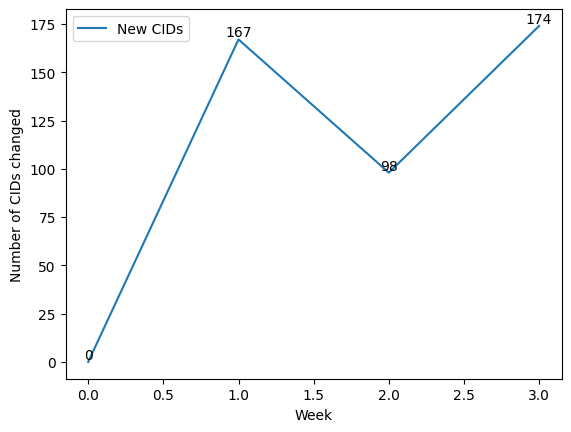

In [22]:
week_files = [f"../store/week{w}/time.csv" for w in range(2,5)]
week_files = [pd.read_csv(w) for w in week_files]

changes_in_peers = change_cid(df,week_files)
pd.DataFrame({"Week":[0,1,2,3],"New CIDs":changes_in_peers}).set_index("Week").plot(ylabel="Number of CIDs changed")
for (xi, yi) in zip([0,1,2,3], changes_in_peers):
    plt.text(xi, yi, yi, va='bottom', ha='center')
if SAVE: 
    plt.savefig(SAVE_PATH+"unequal_cid_over_time.png",bbox_inches='tight')

## different cut of for last week

[0, 167, 98, 170]


<Axes: xlabel='Week', ylabel='Number of CIDs changed'>

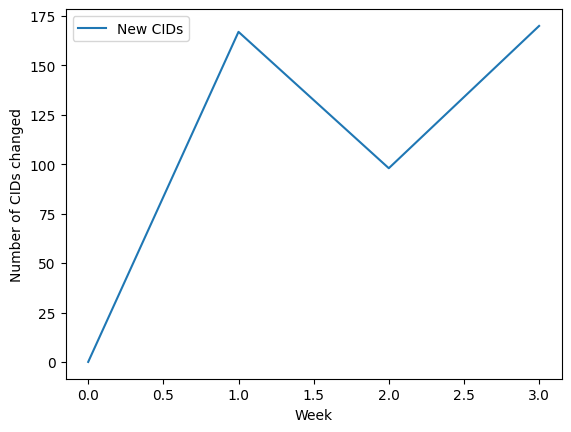

In [19]:
week_files = [f"../store/week{w}/time.csv" for w in range(2,5)]
week_files = [pd.read_csv(w) for w in week_files]
week_files[-1] = week_files[-1][:2441]

changes_in_peers = change_cid(df,week_files)
print(changes_in_peers)
pd.DataFrame({"Week":[0,1,2,3],"New CIDs":changes_in_peers}).set_index("Week").plot(ylabel="Number of CIDs changed")



[333, 166, 235, 163]


<Axes: xlabel='Week', ylabel='Number of CIDs changed'>

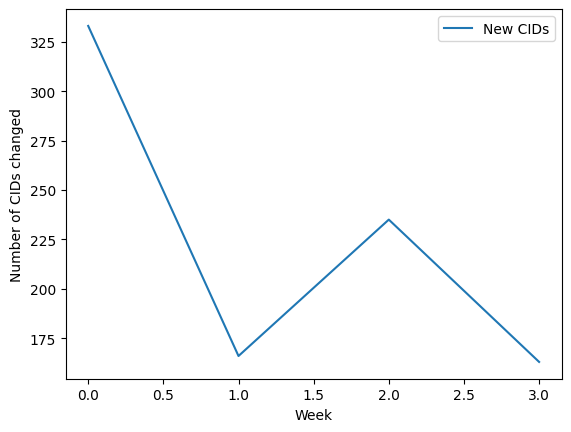

In [21]:
week_files = [f"../store/week{w}/time.csv" for w in range(2,5)]
week_files = [pd.read_csv(w) for w in week_files]
week_files[-1] = week_files[-1][:2441]

changes_in_peers = change_cid(df,week_files)
changes_in_peers = [333-c for c in changes_in_peers]
print(changes_in_peers)
pd.DataFrame({"Week":[0,1,2,3],"New CIDs":changes_in_peers}).set_index("Week").plot(ylabel="Number of CIDs changed")




peers in weeks [2611, 1591, 1724]
changes [0, 902, 902, 902]


<Axes: xlabel='Week', ylabel='Number of CIDs changed'>

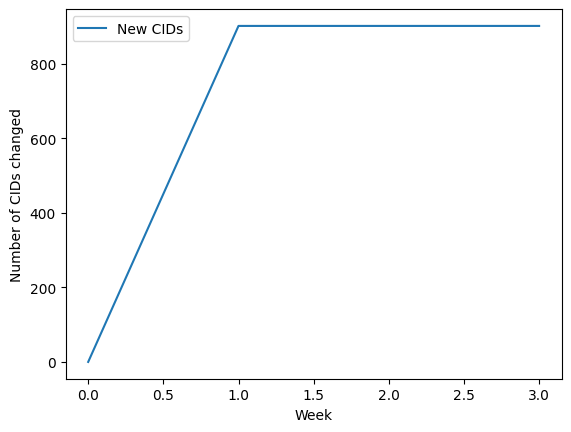

In [20]:
from datetime import timedelta
window = []
number_of_peers = []
for w in week_files:
    w['time'] = pd.to_datetime(w['time'])

    d = timedelta(hours=24)
    w = w[w['time'] < w['time'][0] + d]
    number_of_peers.append(len(w))
    window.append(df)
print("peers in weeks",number_of_peers)

changes_in_peers = change_cid(df,window)
print("changes",changes_in_peers)
pd.DataFrame({"Week":[0,1,2,3],"New CIDs":changes_in_peers}).set_index("Week").plot(ylabel="Number of CIDs changed")